In [1]:
import sys
if not '../..' in sys.path:
    sys.path.append('../..')

In [2]:
from analysis import collection, analysis, plot

from pathlib import Path
import json
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.decomposition import PCA
from analysis import analysis
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import LineCollection
from matplotlib.colors import to_rgba
from IPython.display import HTML

from matplotlib.gridspec import GridSpec

import matplotlib as mpl
mpl.rcParams.update({'axes.labelsize': 16})

%matplotlib inline

image_path = Path("/Users/spencer/phd/phd/images/basic_results/pairplot")

In [3]:
subjects = analysis.load_subjects()

In [4]:
calibration_stacks = np.load("../subject_filtered_calibration_stacks.npy")

In [5]:
calibration_stacks.shape

(46, 2, 32, 64, 1000)

/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:111

<Figure size 500x500 with 0 Axes>

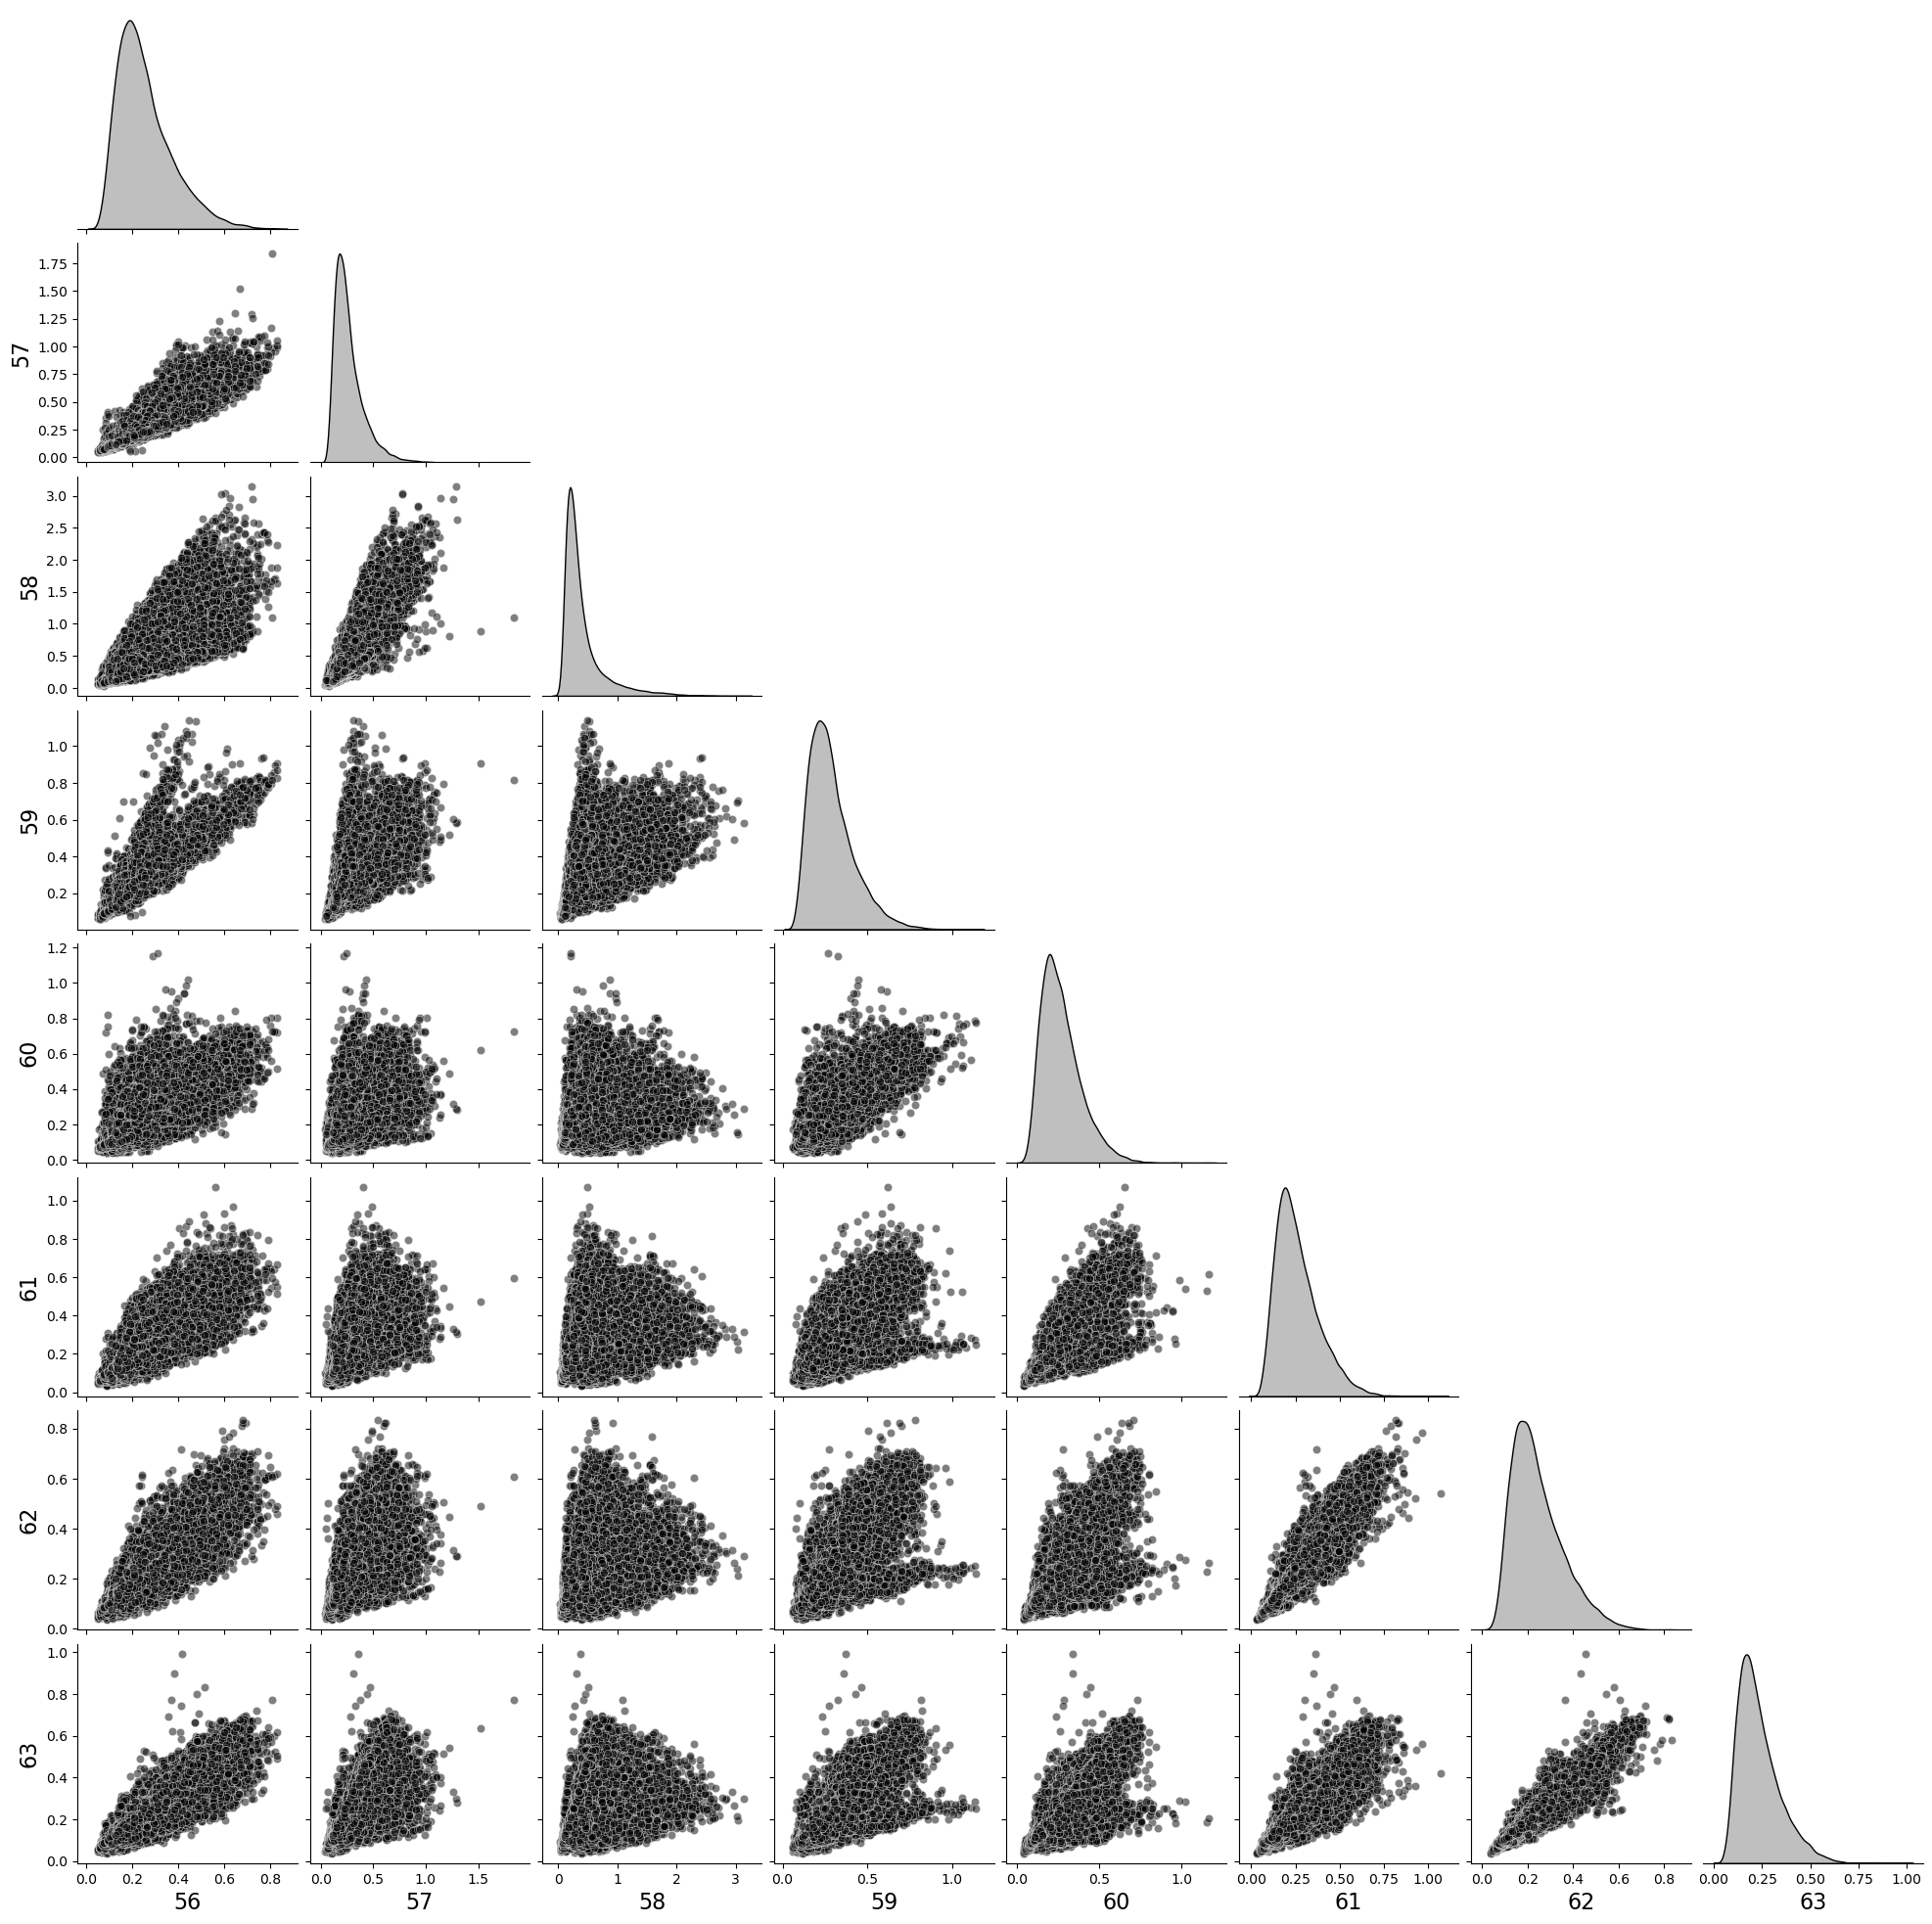

In [6]:
subject_idx = 9
samples = pd.DataFrame((analysis.remove_nan_rows(calibration_stacks[subject_idx].transpose(0,1,3,2).reshape(-1,64))))
plt.figure(figsize=(5,5))
raw_pairplot = sns.pairplot(samples.iloc[:,-8:],diag_kind="kde",corner=True,plot_kws={"alpha":0.5,"markers":0, "color":"k"},diag_kws={"color":"k"})

In [11]:
def save_figure(fig, name, folder=".",filetype='pdf'):
    # if folder doesn't exist, make it
    if folder != ".":
        Path(folder).mkdir(exist_ok=True, parents=True)
        savepath = Path(folder) / Path(name + "." + filetype)
    else:
        savepath = Path(name + "." + filetype)
    fig.savefig(
        savepath,
        pad_inches=0.1,
        bbox_inches="tight",
        dpi=300,
        format=filetype,
        transparent=False,
    )
    print(f"Figure saved to {savepath}")

In [12]:
save_figure(raw_pairplot, "raw_pairplot", image_path, filetype="png")

Figure saved to /Users/spencer/phd/phd/images/basic_results/pairplot/raw_pairplot.png


cut 6 samples


/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:111

<Figure size 500x500 with 0 Axes>

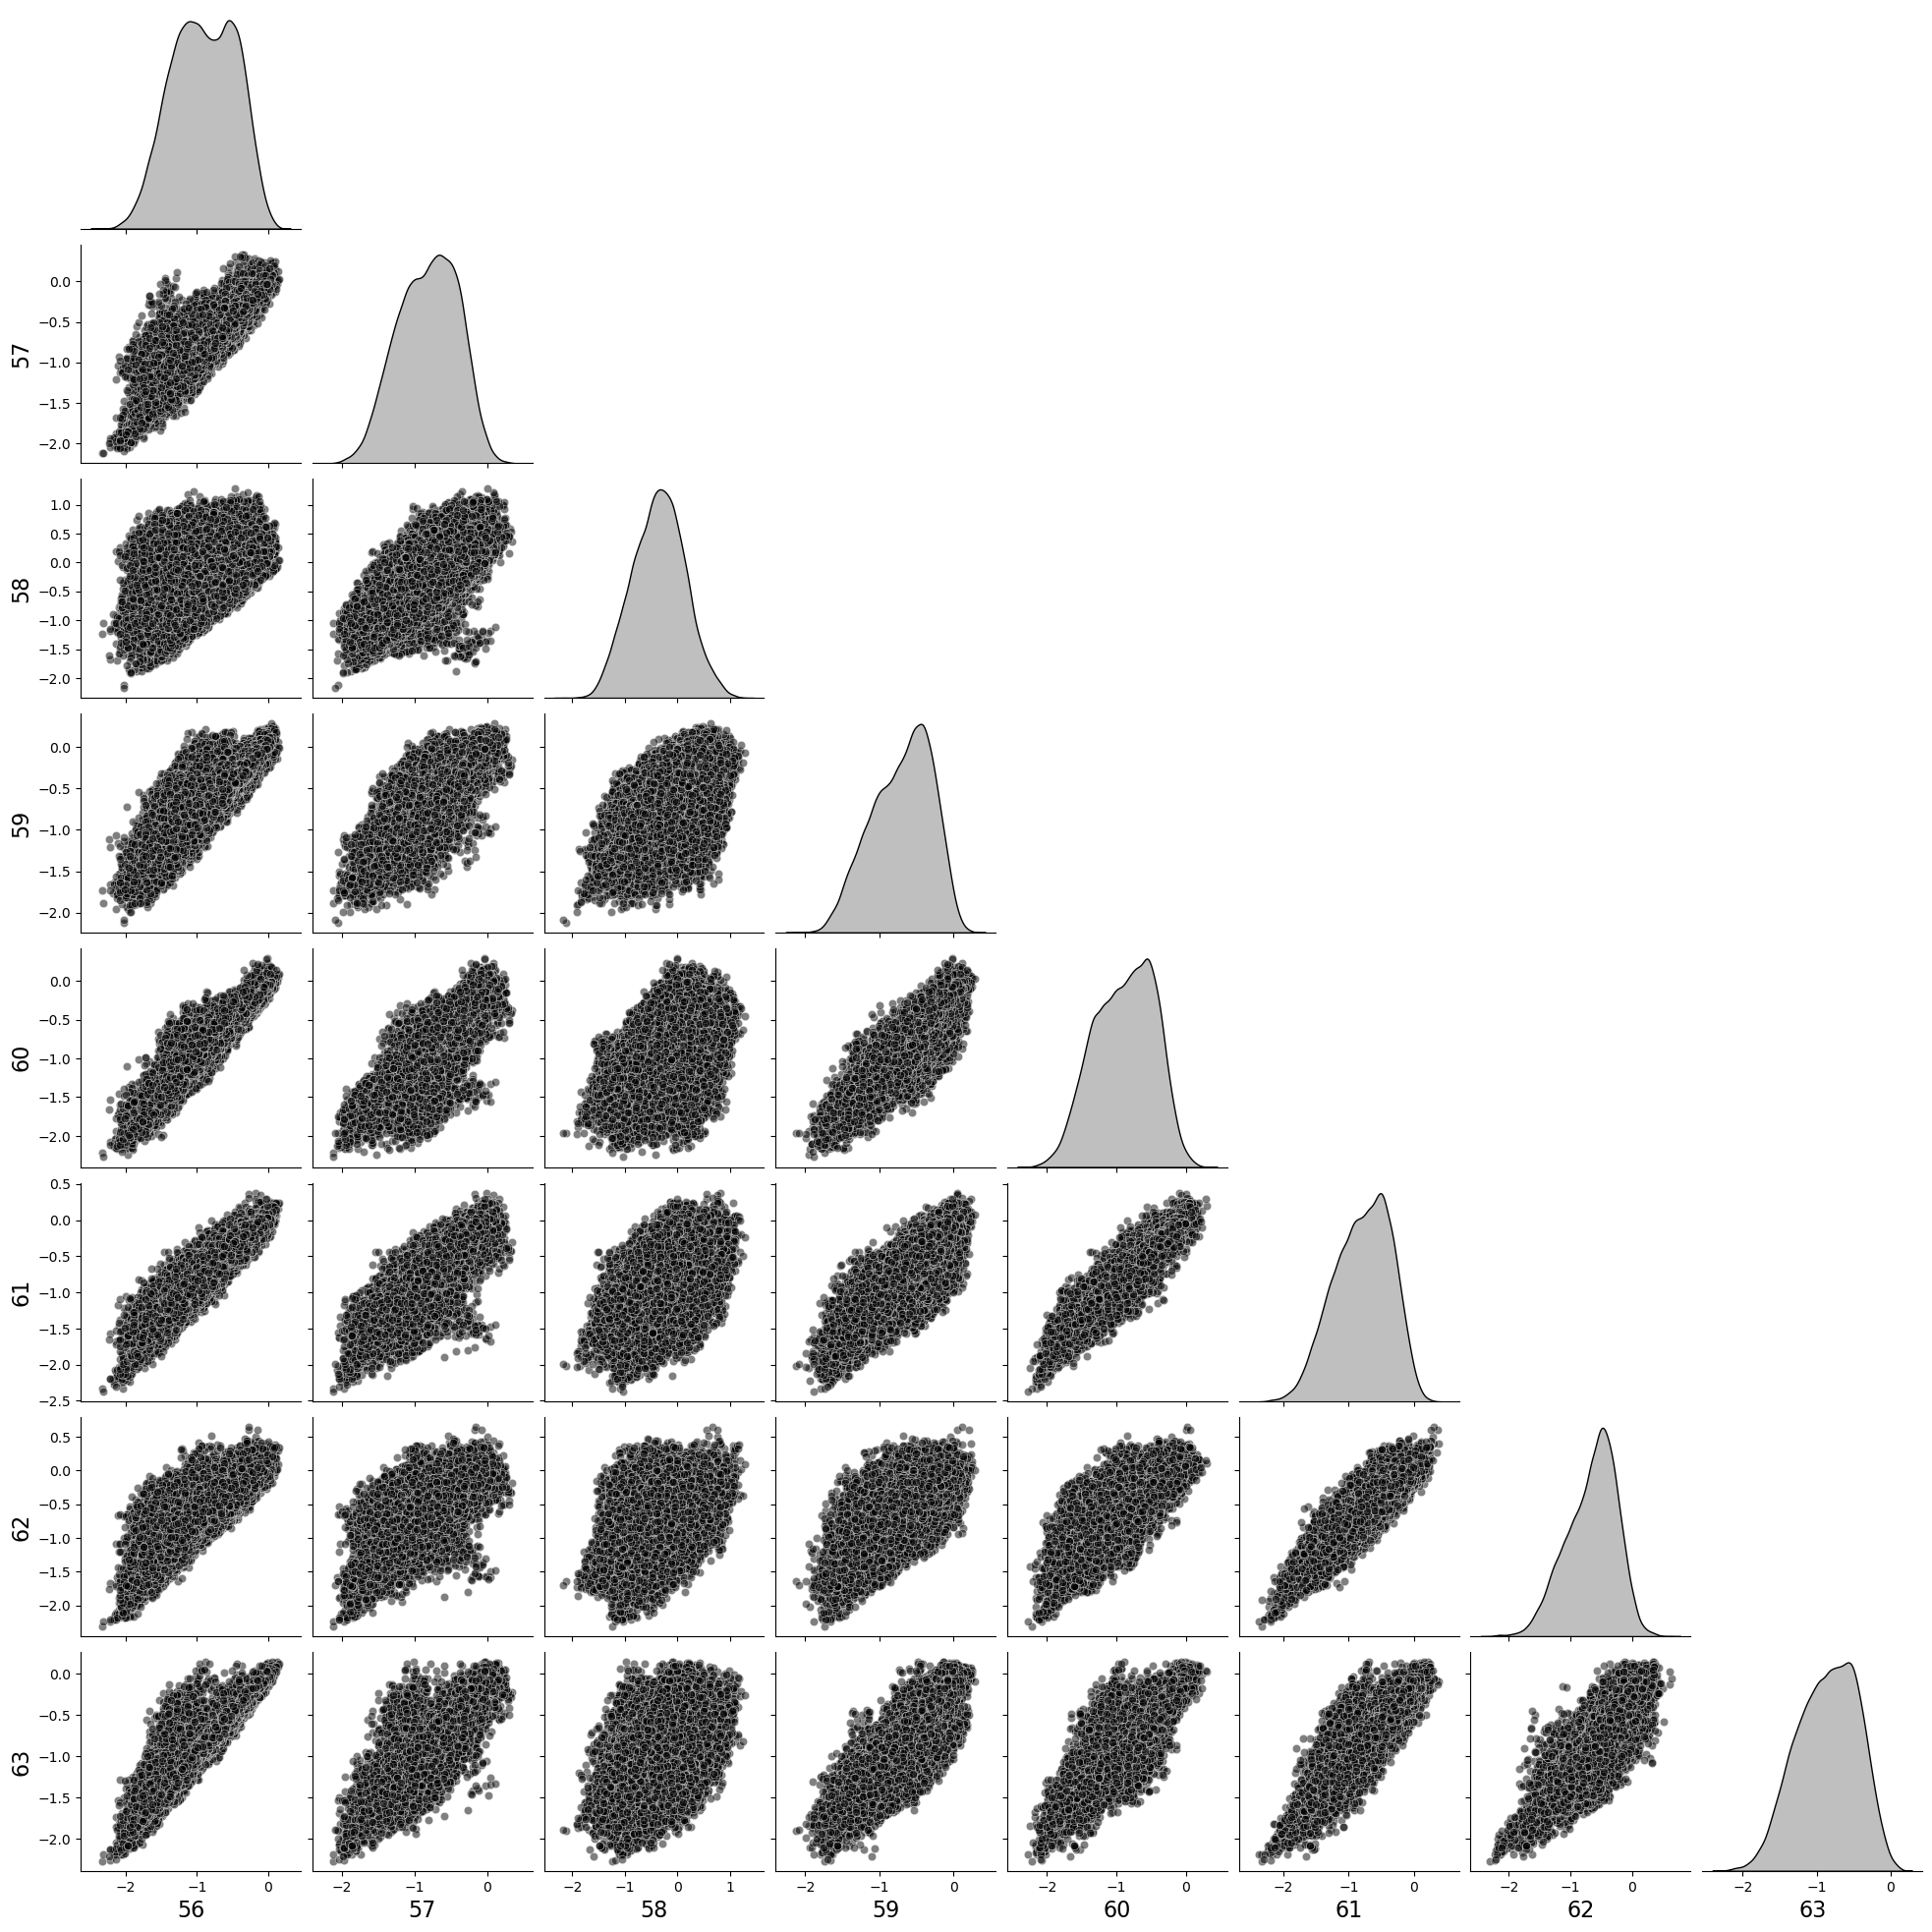

In [9]:
subject_idx = 2
samples = pd.DataFrame((analysis.log_emg_data(analysis.remove_nan_rows(calibration_stacks[subject_idx].transpose(0,1,3,2).reshape(-1,64)))))
plt.figure(figsize=(5,5))
log_pairplot = sns.pairplot(samples.iloc[:,-8:],diag_kind="kde",corner=True,plot_kws={"alpha":0.5,"markers":0, "color":"k"},diag_kws={"color":"k"})

In [13]:
save_figure(log_pairplot, "log_pairplot", image_path, filetype="png")

Figure saved to /Users/spencer/phd/phd/images/basic_results/pairplot/log_pairplot.png


In [ ]:
# mixture of gaussians 

n_dimensions = 64
n_gaussians = 64
n_samples = 2000
mixture_weights = np.ones(shape=(n_gaussians)) / n_gaussians

mixture_idxs = np.random.choice(n_gaussians, size=n_samples, replace=True, p=mixture_weights)

means = np.row_stack([np.ones(n_dimensions) for _ in range(n_gaussians)])
covariances = []
multiple = n_dimensions//n_gaussians
for i in range(n_gaussians):
    cov = np.random.random(size=(n_dimensions,n_dimensions))*0.5
    cov += cov.T
    k = i*multiple
    length = 2
    cov[k:k+length,k:k+length] = 10
    covariances.append(cov)
covariances = np.array(covariances)
print(covariances.shape)

samples = pd.DataFrame(np.array([np.random.multivariate_normal(means[i], covariances[i]) for i in mixture_idxs]),columns=[f"Ch {j}" for j in range(n_dimensions)])
print(samples.shape)